# Housing Price Prediction in King County, USA

Real Estate Investment Trust would like to start investing in Residential real estate. To determining the market price of a house given a set of features. Analyze and predict housing prices using attributes or features such as square footage, number of bedrooms, number of floors, and so on. 

## Dataset Description

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. It was taken from here. Here is the description of the data:

### Variable	Description
id:	A notation for a house
date:	Date house was sold
price:	Price is prediction target
bedrooms:	Number of bedrooms
bathrooms:	Number of bathrooms
sqft_living:	Square footage of the home
sqft_lot:	Square footage of the lot
floors:	Total floors (levels) in house
waterfront:	House which has a view to a waterfront
view:	Has been viewed
condition:	How good the condition is overall
grade:	overall grade given to the housing unit, based on King County grading system
sqft_above:	Square footage of house apart from basement
sqft_basement:	Square footage of the basement
yr_built:	Built Year
yr_renovated:	Year when house was renovated
zipcode:	Zip code
lat:	Latitude coordinate
long:	Longitude coordinate
sqft_living15:	Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area
sqft_lot15:	LotSize area in 2015(implies-- some renovations)

#### Before analysing the dataset we need to understand it's distribution.

Inorder to do that, we will be using describe, isnull, info, dtypes and some plot to analyse the distribution of the dataset.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sn
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housesalesprediction/kc_house_data.csv


In [2]:
# reading the csv file.
housing_data = pd.read_csv('../input/housesalesprediction/kc_house_data.csv')

In [3]:
# viewing the dataset and it's distribution.
housing_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
#disp the first 5 rows of data.
housing_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
# checking all the data types and is there any inconsistencies.
housing_data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
# checking is there any missing data in the datasset.
missing_data = housing_data.isnull()
missing_data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
housing_floors = housing_data

In [8]:
housing_data['floors'].value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

In [9]:
#Dropping id and date from the housing dataset.
housing_floors=housing_floors.drop("id",axis=1)
housing_floors=housing_floors.drop("date", axis=1)

In [10]:
housing_floors.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [11]:
# checking for missing data.
housing_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [12]:
#checking the shape of the dataset.
housing_data.shape

(21613, 21)

In [13]:
#checking whether the column id and date are dropped.
housing_floors.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [14]:
# checking correlation for the whole dataset.
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = housing_data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  """


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.00,-0.02,0.00,0.01,-0.01,-0.13,0.02,-0.00,0.01,-0.02,0.01,-0.01,-0.01,0.02,-0.02,-0.01,-0.00,0.02,-0.00,-0.14
price,-0.02,1.00,0.31,0.53,0.70,0.09,0.26,0.27,0.40,0.04,0.67,0.61,0.32,0.05,0.13,-0.05,0.31,0.02,0.59,0.08
bedrooms,0.00,0.31,1.00,0.52,0.58,0.03,0.18,-0.01,0.08,0.03,0.36,0.48,0.30,0.15,0.02,-0.15,-0.01,0.13,0.39,0.03
bathrooms,0.01,0.53,0.52,1.00,0.75,0.09,0.50,0.06,0.19,-0.12,0.66,0.69,0.28,0.51,0.05,-0.20,0.02,0.22,0.57,0.09
sqft_living,-0.01,0.70,0.58,0.75,1.00,0.17,0.35,0.10,0.28,-0.06,0.76,0.88,0.44,0.32,0.06,-0.20,0.05,0.24,0.76,0.18
sqft_lot,-0.13,0.09,0.03,0.09,0.17,1.00,-0.01,0.02,0.07,-0.01,0.11,0.18,0.02,0.05,0.01,-0.13,-0.09,0.23,0.14,0.72
floors,0.02,0.26,0.18,0.50,0.35,-0.01,1.00,0.02,0.03,-0.26,0.46,0.52,-0.25,0.49,0.01,-0.06,0.05,0.13,0.28,-0.01
waterfront,-0.00,0.27,-0.01,0.06,0.10,0.02,0.02,1.00,0.40,0.02,0.08,0.07,0.08,-0.03,0.09,0.03,-0.01,-0.04,0.09,0.03
view,0.01,0.40,0.08,0.19,0.28,0.07,0.03,0.40,1.00,0.05,0.25,0.17,0.28,-0.05,0.10,0.08,0.01,-0.08,0.28,0.07
condition,-0.02,0.04,0.03,-0.12,-0.06,-0.01,-0.26,0.02,0.05,1.00,-0.14,-0.16,0.17,-0.36,-0.06,0.00,-0.01,-0.11,-0.09,-0.00


<AxesSubplot:xlabel='waterfront', ylabel='price'>

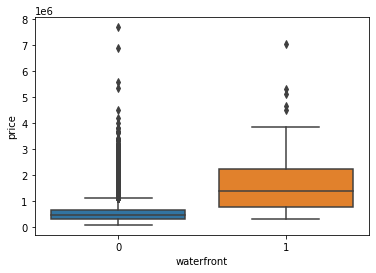

In [15]:
# checking the distribution of waterfront in relation to price.
sn.boxplot(x="waterfront", y="price", data=housing_data)

(0.0, 8081250.0)

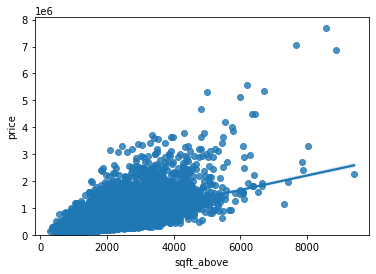

In [16]:
# plotting the regression plot to check the correlation between sqft_above and price.
sn.regplot(x="sqft_above", y="price", data=housing_data)
plt.ylim(0,)

# # Linear Regression

In [17]:
# importing the libraries for linear regression from scikit learn
from sklearn.linear_model import LinearRegression

In [18]:
# specifying individual objects or variable for sqft_living and price.
lm = LinearRegression()
X = housing_data[['sqft_living']]
y = housing_data[['price']]

In [19]:
#fitting the linear regression model.
lm.fit(X,y)

LinearRegression()

In [20]:
# predicting the model.
housing_pred = lm.predict(X)

In [21]:
# viewing the predicted array.
housing_pred[0:5]

array([[287555.06702451],
       [677621.82640197],
       [172499.40418656],
       [506441.44998452],
       [427866.85097324]])

In [22]:
# printing the intercept and coefficient for the simple linear regression.
print("Intercept:",lm.intercept_, "coefficient:", lm.coef_)

Intercept: [-43580.74309447] coefficient: [[280.6235679]]


In [23]:
#measuring mse and R^2
from sklearn.metrics import mean_squared_error
housing_data_mse = mean_squared_error(housing_data['price'], housing_pred)
print("Mean square error for the linear regression:", housing_data_mse)
print("R square for the linear regression is:", lm.score(X,y))

Mean square error for the linear regression: 68351286833.039825
R square for the linear regression is: 0.4928532179037931


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


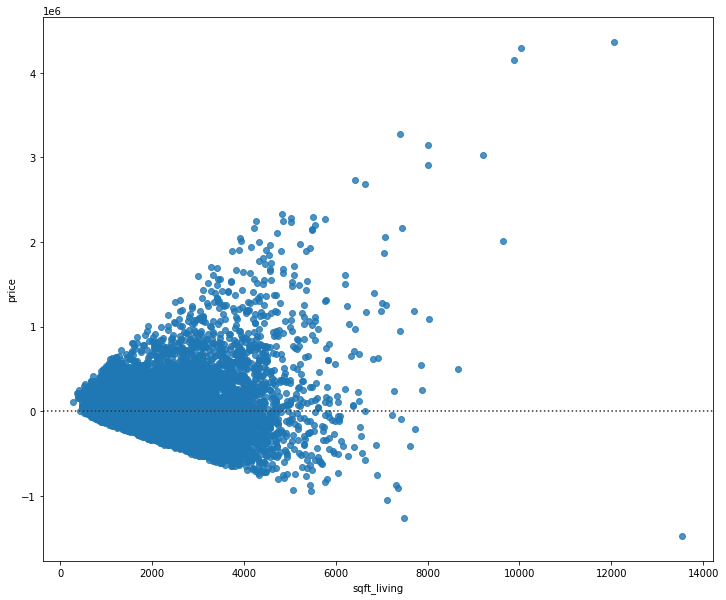

In [24]:
#plotting the residual plot to see the distribution to determine whether it is linear or non-linear.
width = 12
height = 10
plt.figure(figsize=(width, height))
sn.residplot(housing_data['sqft_living'], housing_data['price'])
plt.show()

In [25]:
# Creating a dataframe to include wanted attributes or feature for further analysis.
housing_data_mlr = housing_data.filter(['bedrooms', 'bathrooms', 'sqft_living','floors', 'waterfront', 'view', 'grade','sqft_above', 'sqft_basement', 'lat', 'sqft_living15'], axis = 1)

In [26]:
#checking all data types are as desired.
housing_data_mlr.dtypes

bedrooms           int64
bathrooms        float64
sqft_living        int64
floors           float64
waterfront         int64
view               int64
grade              int64
sqft_above         int64
sqft_basement      int64
lat              float64
sqft_living15      int64
dtype: object

In [27]:
# creating one more list to hold price attribute.
housing_data_target = housing_data.filter(['price'], axis = 1)

In [28]:
housing_data_target.dtypes

price    float64
dtype: object

In [29]:
# importing the test train split function from scikit learn.
from sklearn.model_selection import train_test_split

In [30]:
# splitting the dataset into 75:25.
X_train, X_test ,Y_train ,Y_test =train_test_split(housing_data_mlr, housing_data_target,test_size=0.25,random_state=101)

In [31]:
# printing the shape of the splitted dataset.
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(16209, 11) (5404, 11) (16209, 1) (5404, 1)


# # Multiple Linear Regression

In [32]:
# fitting the model with multiple linear regression
housing_mlr = lm.fit(X_train, Y_train)

In [33]:
housing_mlr_pred = lm.predict(X_test)

In [34]:
housing_mlr_pred[:,]

array([[428642.25811884],
       [652951.39777316],
       [613366.82043268],
       ...,
       [778336.22211777],
       [240503.72979035],
       [733912.25508883]])

In [35]:
#measuring mse and R^2
from sklearn.metrics import mean_squared_error
housing_mlr_mse = mean_squared_error(Y_test['price'], housing_mlr_pred)
print("Mean square error for the linear regression:", housing_mlr_mse)
print("R square for the linear regression is:", lm.score(X_test,Y_test))
print("Intercept:",lm.intercept_, "coefficient:", lm.coef_)

Mean square error for the linear regression: 46345995990.94238
R square for the linear regression is: 0.6730854212468296
Intercept: [-32391858.69013657] coefficient: [[-2.61576271e+04 -8.27995196e+03  1.28215060e+02 -2.53733105e+04
   5.75791588e+05  6.56834412e+04  8.20534693e+04  6.45630024e+01
   6.36520573e+01  6.73040744e+05  8.63919044e+00]]


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


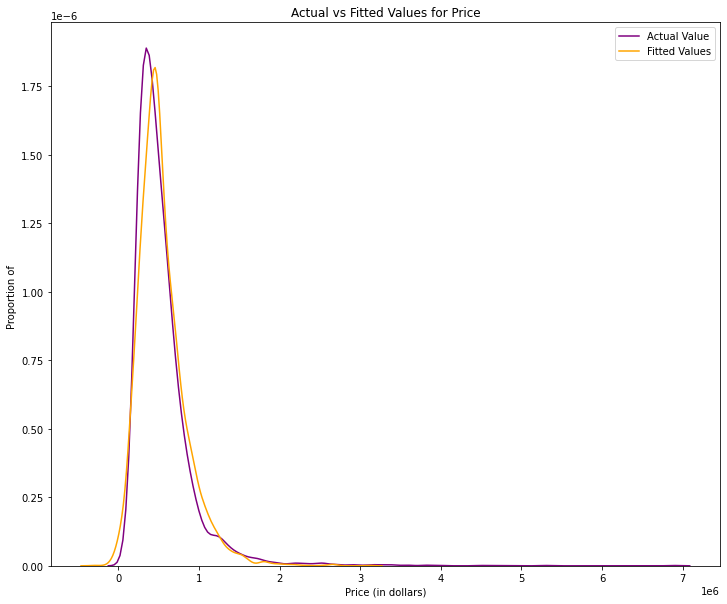

In [36]:
# plotting the model to see how well it is fitting to the actual data.
width = 12
height = 10

plt.figure(figsize=(width, height))
a = sn.distplot(Y_test['price'], hist=False, color="purple", label="Actual Value")
sn.distplot(housing_mlr_pred, hist=False, color="orange", label="Fitted Values" , ax=a)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of ')
plt.legend()
plt.show()
plt.close()

# # Pipeline for Linear Regression

In [37]:
# standardizing the variable before using multiple linear regression to fit the data to predict the price of the house using features.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [38]:
# pipeline for linear regression.
from sklearn.pipeline import Pipeline
function =[('scale',StandardScaler()), ('model',LinearRegression())]

In [39]:
# creating funnel object for pipeline function.
funnel = Pipeline(function)
funnel

Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

In [40]:
# fitting the Linear regression via pipeline that we created.
housing_poly_linear_fit = funnel.fit(X_train, Y_train)

In [41]:
# prediction through the pipeline.
housing_poly_linear_pred = funnel.predict(X_test)

In [42]:
#measuring mse and R^2
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [43]:
# measuring R^2 value for the pipeline linear regression.
r_square = r2_score(Y_test, housing_poly_linear_pred)
r_square

0.6730854212468294

# # Ridge Regression

In [44]:
# Ridge regression with alpha parameter to 0.1
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.1)

In [45]:
housing_ridge_fit =  ridge.fit(X_train, Y_train)

In [46]:
housing_ridge_pred = ridge.predict(X_test)

In [47]:
# measuring R^2 value for the ridge regression.
r_square_ridge = r2_score(Y_test, housing_ridge_pred)
r_square_ridge

0.6730803422668254

# # Polynomial Ridge Regression

In [48]:
# Creating a second order polynomial transform and training it using trainin set with alpha parameter set to 0.1.
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)

In [49]:
x_train_poly=poly.fit_transform(X_train[['bedrooms', 'bathrooms', 'sqft_living','floors', 'waterfront', 'view', 'grade','sqft_above', 'sqft_basement', 'lat', 'sqft_living15']])
x_test_poly=poly.fit_transform(X_test[['bedrooms', 'bathrooms', 'sqft_living','floors', 'waterfront', 'view', 'grade','sqft_above', 'sqft_basement', 'lat', 'sqft_living15']])

In [50]:
housing_ridge_poly = ridge.fit(x_train_poly, Y_train)

In [51]:
housing_rid_pol_pred = ridge.predict(x_test_poly)

In [52]:
# calculating the mean square error for the polynomial ridge regression.
housing_rid_pol_mse = mean_squared_error(Y_test['price'], housing_rid_pol_pred)
housing_rid_pol_mse

36091338041.97423

In [53]:
# measuring R^2 value for the polynamial transform ridge regression.
r_square_ridge_pol = r2_score(Y_test, housing_rid_pol_pred)
r_square_ridge_pol

0.745419548758081

In [54]:
# installing libraries for the plot and training and testing the modle with different alpha parameters to fit the model.
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_poly, Y_train)
    test_score, train_score = RigeModel.score(x_test_poly, Y_test), RigeModel.score(x_train_poly, Y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

  1%|          | 11/1000 [00:01<01:44,  9.42it/s, Test Score=0.747, Train Score=0.728]/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.33741e-18): result may not be accurate.
  overwrite_a=True).T
  1%|          | 11/1000 [00:01<01:44,  9.42it/s, Test Score=0.746, Train Score=0.728]/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.63003e-18): result may not be accurate.
  overwrite_a=True).T
  1%|▏         | 14/1000 [00:01<01:17, 12.71it/s, Test Score=0.746, Train Score=0.728]/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.8329e-17): result may not be accurate.
  overwrite_a=True).T
  1%|▏         | 14/1000 [00:01<01:17, 12.71it/s, Test Score=0.746, Train Score=0.728]/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned

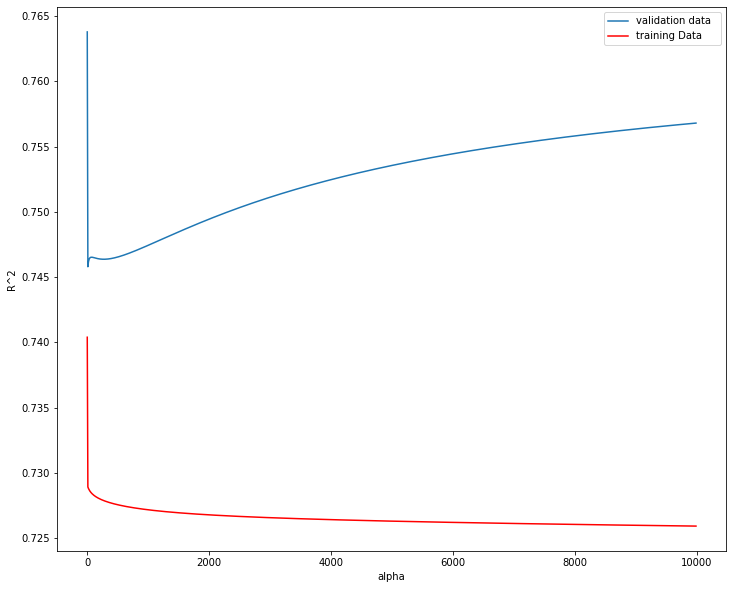

In [55]:
# plottig the training iteration of polynomia ridge regression.
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [56]:
# creating data frame for projection on to map with lat and long
housing_data_geo = housing_data.filter(['price','bedrooms', 'bathrooms', 'sqft_living','floors', 'waterfront', 'view', 'grade','sqft_above', 'sqft_basement', 'long','lat', 'sqft_living15'], axis = 1)

In [57]:
housing_data_geo.describe()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,long,lat,sqft_living15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.494309,0.007542,0.234303,7.656873,1788.390691,291.509045,-122.213896,47.560053,1986.552492
std,3.671272e+05,0.930062,0.770163,918.440897,0.539989,0.086517,0.766318,1.175459,828.090978,442.575043,0.140828,0.138564,685.391304
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,0.000000,0.000000,1.000000,290.000000,0.000000,-122.519000,47.155900,399.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,1.000000,0.000000,0.000000,7.000000,1190.000000,0.000000,-122.328000,47.471000,1490.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,1.500000,0.000000,0.000000,7.000000,1560.000000,0.000000,-122.230000,47.571800,1840.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,2.000000,0.000000,0.000000,8.000000,2210.000000,560.000000,-122.125000,47.678000,2360.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,3.500000,1.000000,4.000000,13.000000,9410.000000,4820.000000,-121.315000,47.777600,6210.000000


# Conditional formating to see with price category is dominant in King County USA

In [58]:
# specifing conditions to form a new column named price_range.
conditions = [
    (housing_data_geo['price'] <= 200000),
    (housing_data_geo['price'] > 200000) & (housing_data_geo['price'] <= 450000),
    (housing_data_geo['price'] > 450000) & (housing_data_geo['price'] <= 1000000),
    (housing_data_geo['price'] > 1000000)
    ]
    

In [59]:
# create a list of the values we want to assign for each condition
values = ['low', 'medium', 'high', 'very_high']

In [60]:
# creating joing the condition and value to form new column.
housing_data_geo['price_range'] = np.select(conditions, values)

In [61]:
housing_data_geo.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,long,lat,sqft_living15,price_range
0,221900.0,3,1.00,1180,1.0,0,0,7,1180,0,-122.257,47.5112,1340,medium
1,538000.0,3,2.25,2570,2.0,0,0,7,2170,400,-122.319,47.7210,1690,high
2,180000.0,2,1.00,770,1.0,0,0,6,770,0,-122.233,47.7379,2720,low
3,604000.0,4,3.00,1960,1.0,0,0,7,1050,910,-122.393,47.5208,1360,high
4,510000.0,3,2.00,1680,1.0,0,0,8,1680,0,-122.045,47.6168,1800,high


In [62]:
housing_data_geo.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
floors           float64
waterfront         int64
view               int64
grade              int64
sqft_above         int64
sqft_basement      int64
long             float64
lat              float64
sqft_living15      int64
price_range       object
dtype: object

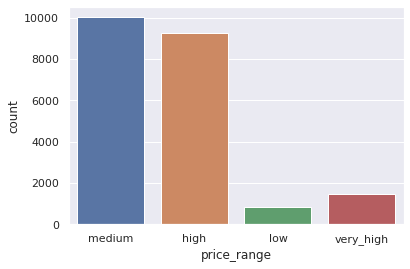

In [63]:
#plotting to find with of the price range is dominant in king county.
#from the graph below we know that most of the houses are in a range of 200,000 to 450,000.
sn.set_theme(style="darkgrid")
ax = sn.countplot(x="price_range", data=housing_data_geo)